<a href="https://colab.research.google.com/github/halehhajizadeh/Astrophysics-course/blob/master/CosmicString.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhbJ7bttzw1gxyqYNUKO8Xmff5C3HR1SCnCeFCtosxvNGfROjIes_s
Mounted at /gdrive


In [2]:
cd /gdrive/My\ Drive/PlanckGBM

/gdrive/My Drive/PlanckGBM


In [3]:
!pip install healpy

     |████████████████████████████████| 18.1 MB 934 kB/s 


In [4]:
!pip install git+https://github.com/vafaei-ar/ccgpack.git

  Cloning https://github.com/vafaei-ar/ccgpack.git to /tmp/pip-req-build-fzeq05nb
  Running command git clone -q https://github.com/vafaei-ar/ccgpack.git /tmp/pip-req-build-fzeq05nb
  Created wheel for ccgpack: filename=ccgpack-0.1.0-cp37-cp37m-linux_x86_64.whl size=910099 sha256=69539dbab031dfe3847e8ada595d2b41b9bf8a0202e1bc915a9d7d9644ade170
  Stored in directory: /tmp/pip-ephem-wheel-cache-mbyozp9l/wheels/12/6f/95/7ae57565d174cea0e92a0da0a36f289e045f46ef2173da656b
Successfully built ccgpack


In [5]:
import sys
sys.path.append('/gdrive/My\ Drive/git_reps/ccgpack')

# Importing Libraries


In [6]:
%matplotlib inline

import os
import sys
import shutil
import argparse
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import gzip
import ccgpack as ccg

from healpy import cartview

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import math
import pickle
import pprint
import random
import urllib
import requests
from time import gmtime, strftime
from matplotlib.colors import LogNorm

In [7]:
import logging
logging.basicConfig(filename='./info.log', level=logging.DEBUG)

In [8]:
cmap = plt.cm.jet
cmap.set_under('w')
cmap.set_bad('gray',1.)

# Downloading Cosmic String Map

In [9]:
def make_directory(directory):
    """make_directory is a function creates a directory if it does not exist.
    Args:
        directory (str): Path to the directory.		

    Returns: None    
    """
    if not os.path.exists(directory):
        try:
            os.makedirs(directory)
        except Exception as e:
            logging.error('Can NOT make directory')
            logging.error(str(e))
    return None  

In [ ]:
import requests
def download_data(url, file_name):
    """download_data is a funtion that download data from a url link and save it in a directory.
    Args:
        url (str): url of the resource to download.
        file_name (str): a name that the downloaded data will save by that.

    Returns: 
        None    
    """
    if file_name is None:
        file_name = url.split('/')[-1]
    r = requests.get(url, allow_redirects=True)
    with open(file_name, 'wb') as f:
        f.write(r.content)  

In [ ]:
def extract(input_file,output_file):
    """extract funtions can take a zipped file and unzip that.
    Args:
        input_file (str):
        output_file (str): 
    """
    with gzip.open(input_file, 'rb') as f_in:
        with open(output_file, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [ ]:
make_directory('./data/string/') 

In [ ]:
nside = 2048
l_max = 2*nside
number_string = 1  # The number of string map that we want to download it. 

In [ ]:
for i in range(number_string): 
    os.path.exists('./data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits.gz')
    print('Downloading string: '+str(i))
    download_data('http://cp3.irmp.ucl.ac.be/~ringeval/upload/data/'+str(nside)+'/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits.gz',
    './data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits.gz')
    if not os.path.exists('./data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits'):
        print('Extracting string: '+str(i))
        in_file = './data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits.gz'
        out_file = './data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(i+1)+'.fits'
        extract(in_file,out_file)

Text(0.5, 1.0, 'Cosmic String Map')

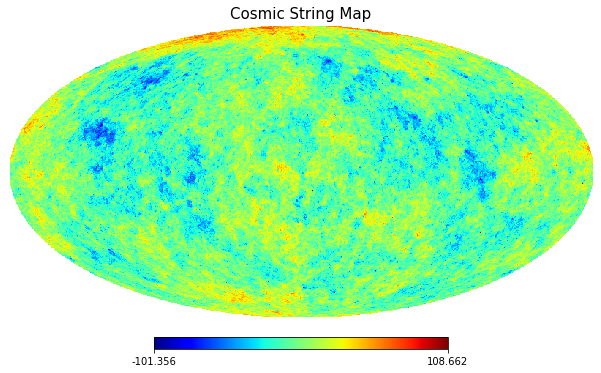

In [ ]:
string_map = hp.read_map('./data/string/map1n_allz_rtaapixlw_'+str(nside)+'_1'+'.fits',nest=1)     
hp.mollview(string_map, cmap=cmap, nest=1)
plt.title('Cosmic String Map', fontsize=15)

# Downloading CMB Simulation map

In [ ]:
make_directory('./data/dx/') 

In [ ]:
number_cmb = 1

In [ ]:
for i in range(number_cmb):
    for map_type in ['cmb','noise']:
        os.path.exists('./data/dx/dx12_v3_smica_{}_mc_0000'+str(i)+'_raw.fits'.format(map_type))
        print('Downloading {} simulation: '.format(map_type))
        download_data('http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=dx12_v3_smica_{}_mc_0000'+str(i)+'_raw.fits'.format(map_type),
                        './data/dx/dx12_v3_smica_{}_mc_0000'+str(i)+'_raw.fits'.format(map_type))
        print('Downloading {} simulation completed '.format(map_type))

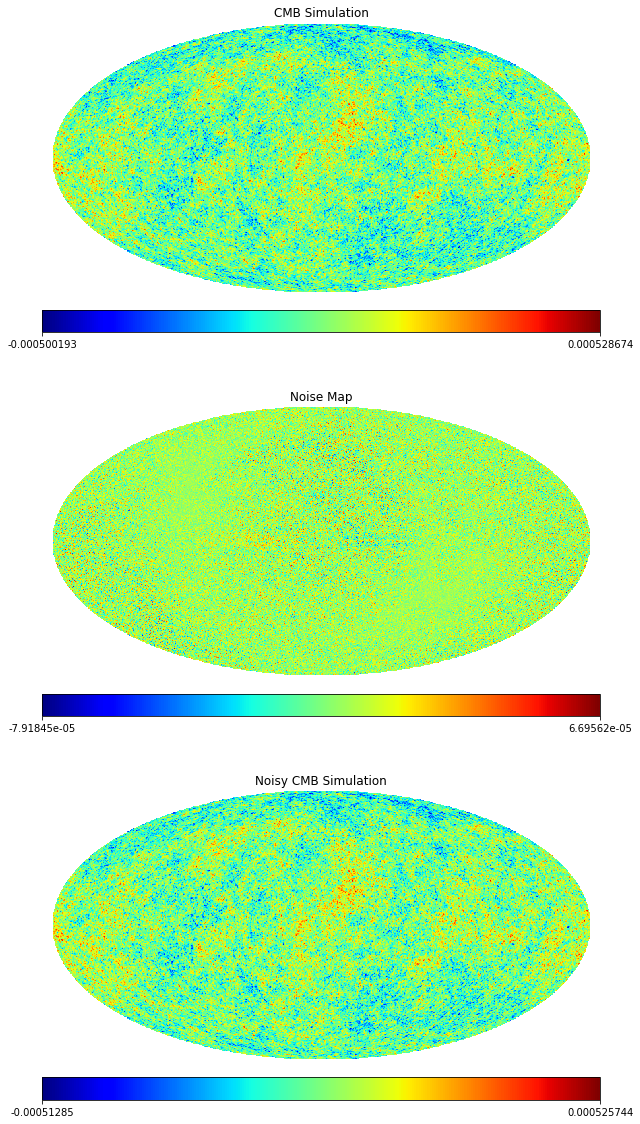

In [ ]:
cmb_map = hp.read_map('./data/dx/dx12_v3_smica_cmb_mc_00000_raw.fits',nest=1)   
noise_map = hp.read_map('./data/dx/dx12_v3_smica_noise_mc_00000_raw.fits',nest=1)   
cmb_map_total = cmb_map + noise_map 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,20))

plt.axes(ax1)
hp.mollview(cmb_map, cmap=cmap, nest=1, hold=True, title='CMB Simulation')  

plt.axes(ax2)
hp.mollview(noise_map, cmap=cmap, nest=1, hold=True, title='Noise Map')  

plt.axes(ax3)
hp.mollview(cmb_map_total, cmap=cmap, nest=1, hold=True, title='Noisy CMB Simulation') 

# Dividing Maps to Patches

## Functions

In [11]:
def kelvin_check(m):
    """
    """
    if m.std()>1e-2:
        m = 1e-6*m
    return m 

In [ ]:

def patch_maker(map_type, number_map, number_patches, nside=2048):
    """
    Args:
        map_type (str): 
        number_map (int):
        number_patches (int): It should be a number that obey this equation: 12*a**2
        nside (int):
    """
    n_patch = np.log2((number_patches/12)) + 1
    n_patch = int(n_patch)
    if map_type == 'cmb' or map_type == 'noise':
        make_directory('./data/dx/'+str(map_type)+'_patches')
        for i in range(number_map):
            map = hp.read_map('./data/dx/dx12_v3_smica_'+str(map_type)+'_mc_0000'+str(i)+'_raw.fits',nest=1)
            map = kelvin_check(map)
            map = ccg.sky2patch(map,int(n_patch))
            for j in range(number_patches):
                print(str(map_type)+'_'+'map number_' + str(i) + '_patch number_' + str(j+1)+' is Done') 
                np.save('./data/dx/'+str(map_type)+'_patches/'+'imap'+str(i)+'_ipatch'+str(j)+'_'+str(nside)+'.npy',map[j])

    elif map_type == 'string':
        for i in range(number_map):
            make_directory('./data/string/'+str(map_type)+'_patches')
            map = hp.read_map('./data/string/map1n_allz_rtaapixlw_'+str(nside)+'_'+str(number_map)+'.fits',nest=1)
            map = kelvin_check(map)
            map = ccg.sky2patch(map,int(n_patch))
            for j in range(number_patches):
                print(str(map_type)+'_'+'map number_' + str(i) + '_patch number_' + str(j+1)+' is Done') 
                np.save('./data/string/'+str(map_type)+'_patches/'+'imap'+str(i)+'_ipatch'+str(j)+'_'+str(nside)+'.npy',map[j])


In [ ]:
def blocker(array, rows_size, columns_size):
    """This function devides a total map to small parts that we call them patches.
    Args:
        array (int):
        rows_number (int):
        columns_number (int):
    """
    h, w = array.shape
    return (array.reshape(h//rows_size, rows_size, -1, columns_size)
               .swapaxes(1,2)
               .reshape(-1, rows_size, columns_size))

In [ ]:
patch_maker('string', 1, 12, 2048)

In [ ]:
patch_maker('cmb', 1, 12, 2048)

In [ ]:
patch_maker('noise', 1, 12, 2048)

## Visualizing Patches

In [ ]:
cmb_patch = np.load('./data/dx/cmb_patches/imap0_ipatch11_2048.npy')
noise_patch = np.load('./data/dx/noise_patches/imap0_ipatch11_2048.npy')
string_patch = np.load('./data/string/string_patches/imap0_ipatch11_2048.npy')

In [ ]:
cmb_patch.std()

0.00010571387

In [ ]:
string_patch.std()

1.46498905e-05

Text(0.5, 1.0, '2048 String patch')

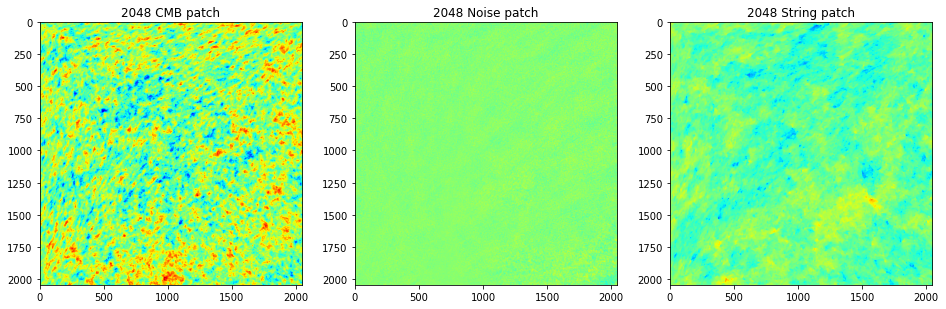

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(16,11))

axs[0].imshow(cmb_patch, cmap ='jet')
axs[0].set_title('2048 CMB patch')
axs[1].imshow(noise_patch, cmap ='jet')
axs[1].set_title('2048 Noise patch')
axs[2].imshow(string_patch, cmap ='jet')
axs[2].set_title('2048 String patch')


In [ ]:
map_number = 1
patch_number = 12
map_type = 'cmb'
dict = {}
for i in range(map_number):
    for j in range(patch_number):
        patches = np.load('./data/dx/cmb_patches/imap/'+str(map_number)+'_ipatch'+str(patch_number)+'_'+str(nside)+'.npy')
        patches = blocker(patches, 256, 256)
        np.save 


In [ ]:
data = {}
patches_paths = ['./data/dx/cmb_patches', './data/dx/noise_patches', './data/string/string_patches/']
map_types = ['cmb', 'noise', 'string']
for xpath, map_type in zip(patches_paths, map_types):
    for npfile in os.listdir(xpath):
        path = os.path.join(xpath, npfile)
        ar = np.load(path)
        subpatches = blocker(ar, 256, 256)
        if data.get(npfile.replace("_2048.npy",""), None) is None:
            data[npfile.replace("_2048.npy","")] = {map_type: subpatches}
        else:
            data[npfile.replace("_2048.npy","")][map_type] = subpatches

In [ ]:
data.keys()

dict_keys(['imap0_ipatch6', 'imap0_ipatch3', 'imap0_ipatch2', 'imap0_ipatch5', 'imap0_ipatch4', 'imap0_ipatch1', 'imap0_ipatch0', 'imap0_ipatch7', 'imap0_ipatch8', 'imap0_ipatch9', 'imap0_ipatch10', 'imap0_ipatch11'])

In [ ]:
for key, value in data.items():
    data[key]['cmb+noise'] = data[key]['cmb'] + data[key]['noise']


In [ ]:
data['imap0_ipatch0']['c']

KeyError: ignored

In [ ]:
data.get('wefwefwefwef', None)

# Image Processing

In [ ]:
for i in range(12):
    

# Clasical Analysis